In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [191]:
file_path=r'C:\Users\akshy\Sem 4 notes\Movie_regression.csv'
df = pd.read_csv (file_path, encoding='latin-1')
df.head ()
df=df.dropna()

In [288]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 505
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    494 non-null    float64
 1   Production expense   494 non-null    float64
 2   Multiplex coverage   494 non-null    float64
 3   Budget               494 non-null    float64
 4   Movie_length         494 non-null    float64
 5   Lead_ Actor_Rating   494 non-null    float64
 6   Lead_Actress_rating  494 non-null    float64
 7   Director_rating      494 non-null    float64
 8   Producer_rating      494 non-null    float64
 9   Critic_rating        494 non-null    float64
 10  Trailer_views        494 non-null    int64  
 11  Time_taken           494 non-null    float64
 12  Twitter_hastags      494 non-null    float64
 13  Genre                494 non-null    object 
 14  Avg_age_actors       494 non-null    int64  
 15  Num_multiplex        494 non-null    int64  


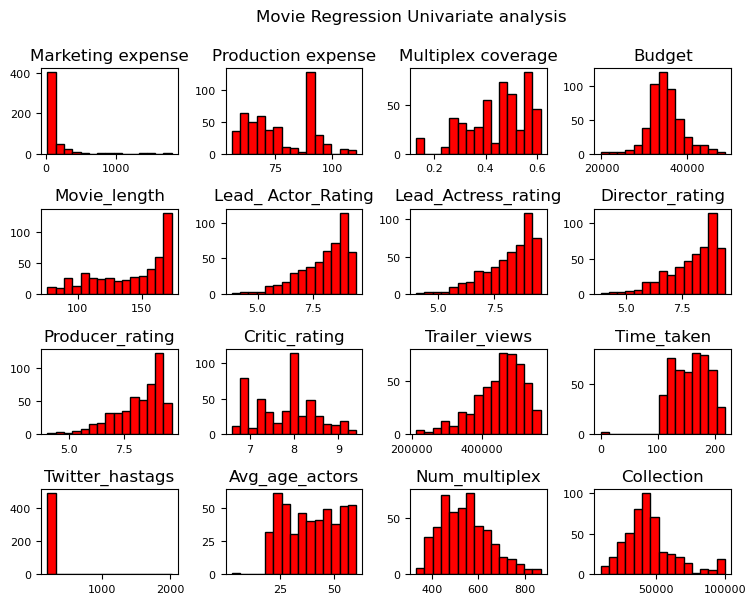

In [193]:
df.hist (bins = 15, color = "r", edgecolor = "black", xlabelsize = 8, ylabelsize = 8, 
        linewidth = 1, grid = False)

plt.tight_layout (rect = (0,0, 1.2,1.2))

plt.suptitle ("Movie Regression Univariate analysis", x = 0.65, y = 1.25)
plt.show ()

In [272]:
label_encoder = LabelEncoder()
label= label_encoder.fit_transform(df['Genre'])
df['Genre']=label

In [273]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,1,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,395,72400


In [274]:
corr = df.corr ()

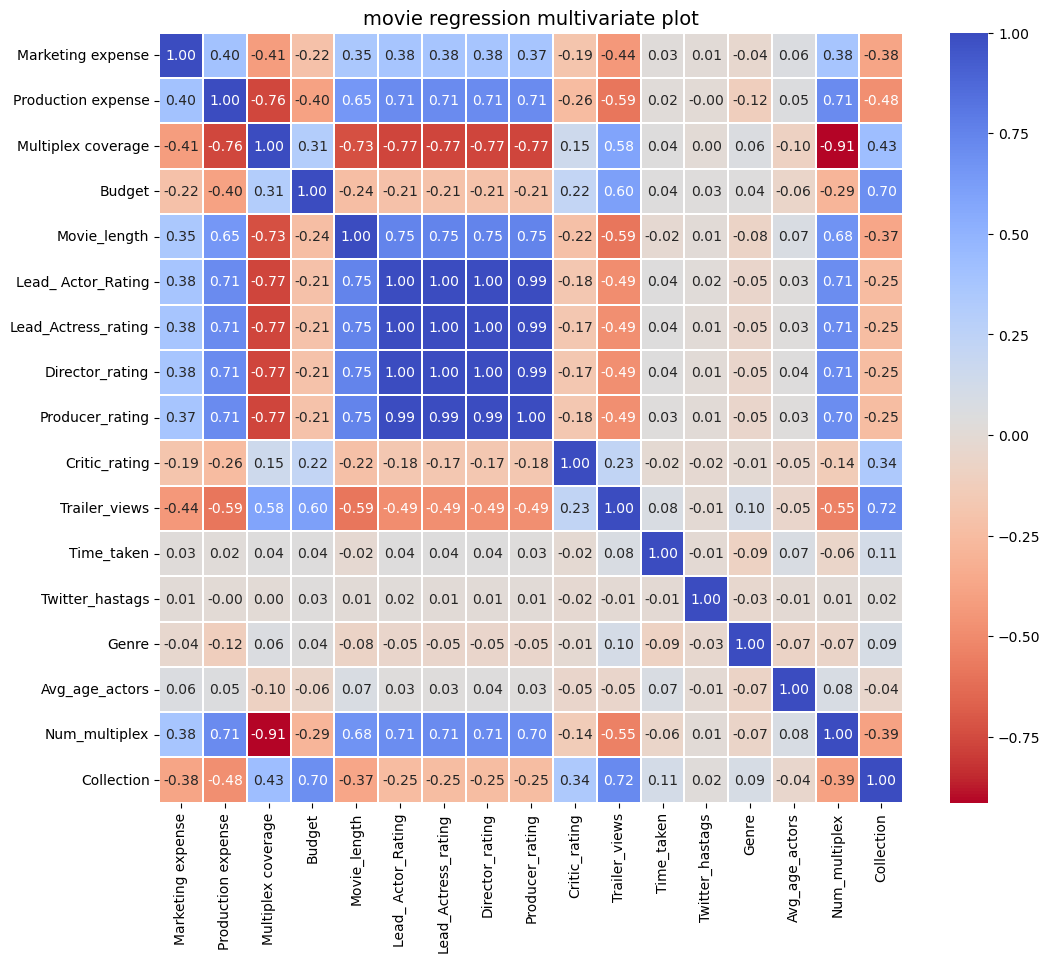

In [275]:
plt.figure (figsize = (12, 10))

sns.heatmap (corr, annot = True, fmt = ".2f", cmap = "coolwarm_r", linewidth = 0.2)

plt.title ("movie regression multivariate plot", fontsize = 14)
plt.show ()

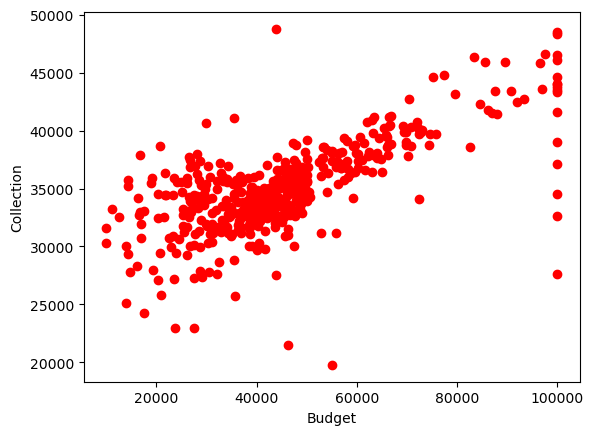

In [276]:
plt.scatter (df["Collection"], df["Budget"], color = "red")

plt.xlabel ("Budget")
plt.ylabel ("Collection")
plt.show ()

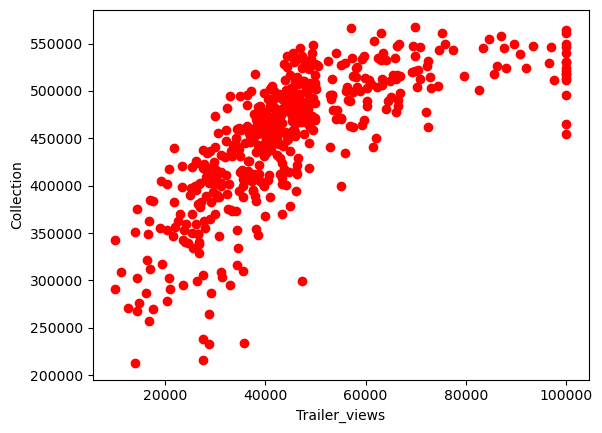

In [277]:
plt.scatter (df["Collection"], df["Trailer_views"], color = "red")

plt.xlabel ("Trailer_views")
plt.ylabel ("Collection")
plt.show ()

C:\Users\akshy\AppData\Local\Temp\ipykernel_8780\3643317621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (x = "Genre", y = "Collection", data = df, palette = "colorblind")


<Axes: xlabel='Genre', ylabel='Collection'>

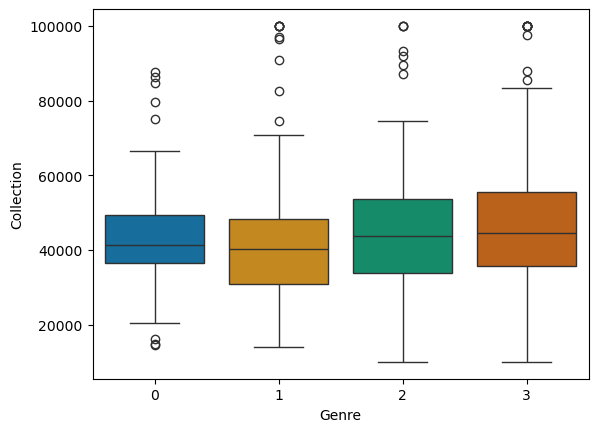

In [278]:
sns.boxplot (x = "Genre", y = "Collection", data = df, palette = "colorblind")

In [279]:
X=df[['Marketing expense','Production expense','Multiplex coverage','Budget','Movie_length','Lead_ Actor_Rating','Lead_Actress_rating','Director_rating','Producer_rating','Critic_rating','Trailer_views','Time_taken','Twitter_hastags','Genre','Avg_age_actors','Num_multiplex']]
Y=df[['Collection']]

In [280]:
numeric_features=['Marketing expense','Production expense','Multiplex coverage','Budget','Movie_length','Lead_ Actor_Rating','Lead_Actress_rating','Director_rating','Producer_rating','Critic_rating','Trailer_views','Time_taken','Twitter_hastags','Genre','Avg_age_actors','Num_multiplex']
categorical_features=['Genre']

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_absolute_error

df['Genre']=label_encoder.inverse_transform(label)
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer =Pipeline(steps=[('onehot', OneHotEncoder (handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)

])


model=Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2,random_state=42)

In [282]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [283]:
y_test = np.array(y_test, dtype=float)
y_pred = np.array(y_pred, dtype=float)
mean=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'mean absolute error: {mean}')

R^2 Score: 0.7258223521432454
mean absolute error: 6185.983622143777


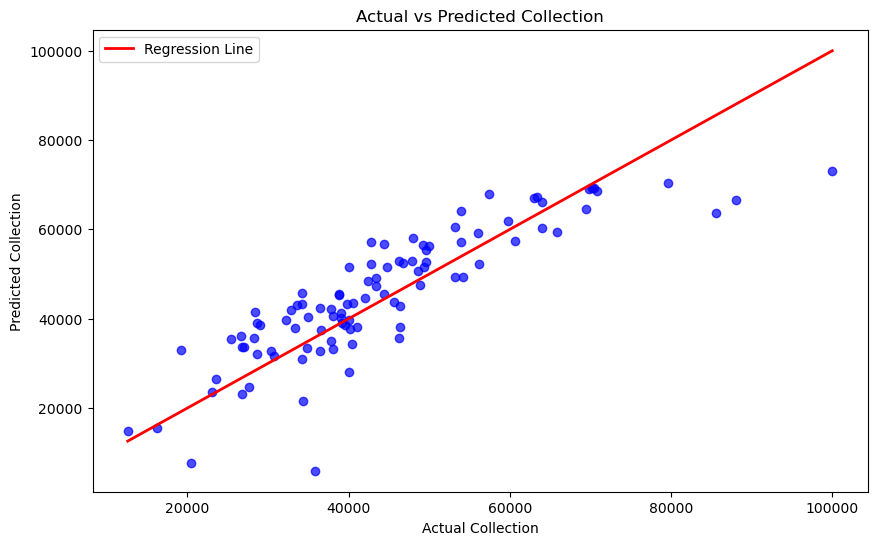

In [284]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Collection')
plt.ylabel('Predicted Collection')
plt.title('Actual vs Predicted Collection')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color='red', linestyle='-', linewidth=2, label='Regression Line')
plt.legend()
plt.show()



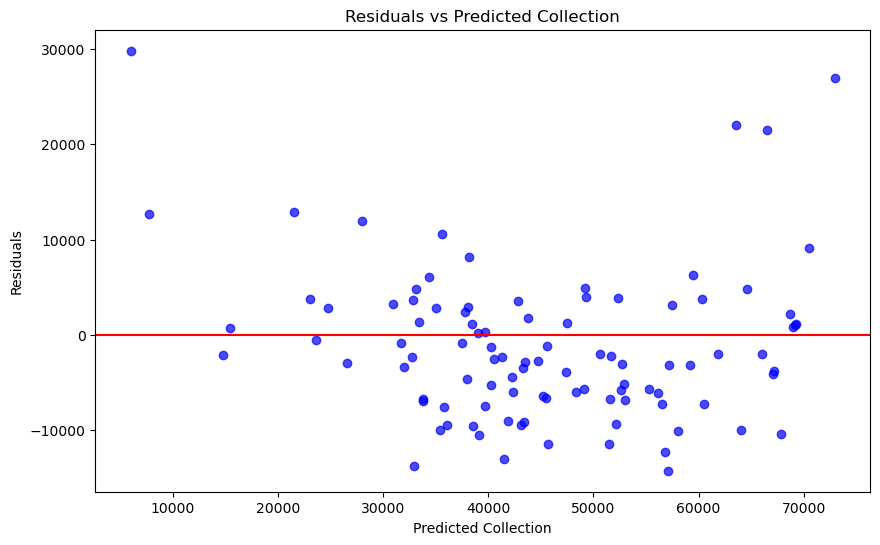

In [285]:
residuals=y_test-y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.xlabel('Predicted Collection')
plt.ylabel('Residuals')
plt.title("Residuals vs Predicted Collection")
plt.axhline(y=0, color='red')
plt.show()


In [287]:
new_data=pd.DataFrame({
    'Marketing expense':[15.0000,18.0000],
'Production expense':[20.00, 50.00],
'Multiplex coverage':[0.56, 0.75],
'Budget':[3000000, 3483973],
'Movie_length':[138.4, 276.7],
'Lead_ Actor_Rating':[8.54, 2.75],
'Lead_Actress_rating':[7.23, 5.3],
'Director_rating':[7.32, 10],
'Producer_rating':[7.9, 9.54],
'Critic_rating':[7.54, 8.03],
'Trailer_views':[527367, 647626],	
    'Time_taken':[160.92, 156.54],	
'Twitter_hastags':[254.87, 2022.400],	
'Genre':[1, 3],	
'Avg_age_actors':[24, 46],
'Num_multiplex':[48000, 68002]})
new_prediction=model.predict(new_data)
print(new_prediction)


[[5271066.55209842]
 [6242955.95955022]]
